In [1]:
#snapshots framewise
import cv2
import math
import random

N=1000
frames=random.sample(range(0, 50000), N)
leng=len(frames)

vid_link ='/home/devanandt/Documents/FACE_VEC_LANG/merged_tagged.mp4'
snapshot=[]
cap = cv2.VideoCapture(vid_link)
pt=[]
#while(cap.isOpened()):
for i in frames:
    cap.set(1, i)
    ret,im = cap.read()
    if im is None:    
        break
    imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    snapshot.append(cv2.resize(imGray, (384,256)))#####

cap.release()

In [2]:
import numpy as np
from matplotlib import pyplot as plt

1000


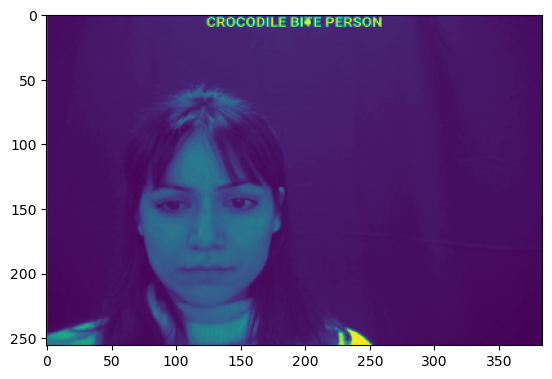

In [3]:
leng=np.shape(snapshot)[0]
print(leng)
plt.imshow(snapshot[1])

(1000, 48, 48)


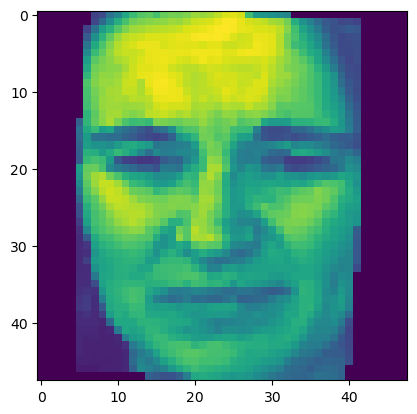

In [4]:
from deepface import DeepFace
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

faces=[]
for i in range(leng):
    face = DeepFace.detectFace(cv2.cvtColor(snapshot[i],cv2.COLOR_BGR2RGB), target_size = (48, 48), detector_backend = backends[3])
    face=face[:,:,0]
    faces.append(face) 
print(np.shape(faces))
plt.imshow(face)

(1000, 48, 48)


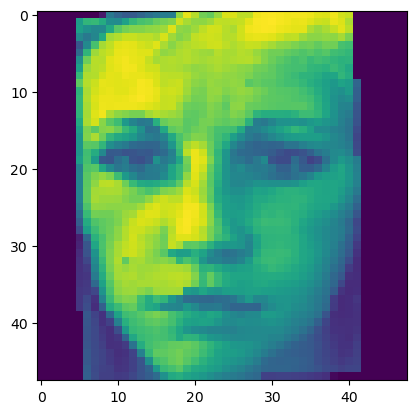

In [5]:
idx=109
input = faces[idx]
print(np.shape(faces))
plt.imshow(faces[idx])

In [5]:
# summarize filters in each NN layer
from keras.models import load_model, Model
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np
import sys

# def image_to_feature_vector(image):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
#     return cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48,48)).reshape(1, 48, 48) # not 48,48,1 but 1,48,48. some mismatch between libraries in handling data

#loads a pre-trained model for expression classification
model = load_model('/home/devanandt/Documents/FACE_VEC_LANG/IDENTITY_DISENTANGLEMENT_PAPERS/CNN_FER/CNN_FER2013_modelexceptDISGUST/model_except_disgust.h5')

# image_test = cv2.imread(sys.argv[1])
##inp = faces[idx].reshape(1,48,48)
# inp = image_to_feature_vector(image_test)
##print(np.shape(inp))

# summarize filter shapes
#for layer in model.layers:
	# check for convolutional layer
	#if 'conv' not in layer.name:
	#	continue
	# get filter weights
	#filters, biases = layer.get_weights()
    #print(layer.name)
	#print(layer.name, filters.shape)
# layer_name='dropout_3'
# layer_name='maxpool2d_1'
# layer_name='conv2d_2'
layer_name='dropout_4'
intermediate_layer_model = Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output)
#intermediate_layer_model = Model(inputs=model.inputs,outputs=model.layers[4].output)

nth_layer_outputs=[]
for idx in range(leng):
    output=intermediate_layer_model.predict(faces[idx].reshape(1,48,48))
    nth_layer_outputs.append(output[0])

print(np.shape(nth_layer_outputs))
# output=output[:,:,:,0].reshape(6,6)
#s=np.shape(output)[-1]
#output=output[:,:,:,round(s-(s/2))].reshape(48,48)

#plt.imshow(output)
#plt.show()

(1000, 128)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
pca.fit(nth_layer_outputs)
print(pca.explained_variance_ratio_)
pca_emb = pca.fit_transform(nth_layer_outputs)

[6.33299550e-01 1.39177555e-01 6.75738298e-02 5.19359128e-02
 2.16243578e-02 1.54857945e-02 1.07248737e-02 7.94754163e-03
 7.17034897e-03 5.28817371e-03 3.95609279e-03 3.57195509e-03
 2.47701265e-03 2.44774352e-03 1.80767017e-03 1.62447695e-03
 1.37003477e-03 1.26073601e-03 1.21565614e-03 1.10279821e-03
 1.04857188e-03 9.23133903e-04 7.68718614e-04 6.80664848e-04
 6.76023386e-04 6.30174726e-04 5.86603309e-04 5.73900651e-04
 5.46540088e-04 5.00790126e-04 4.83428279e-04 4.50171068e-04
 4.34206242e-04 4.18431139e-04 3.84615863e-04 3.71445111e-04
 3.61040311e-04 3.36777246e-04 3.23159262e-04 3.00323534e-04
 2.81471065e-04 2.78012650e-04 2.63736637e-04 2.59272485e-04
 2.44254881e-04 2.40768749e-04 2.35735796e-04 2.14636001e-04
 2.06815905e-04 2.05158494e-04 1.86546670e-04 1.80978025e-04
 1.73147145e-04 1.70664690e-04 1.64449259e-04 1.57679927e-04
 1.51271212e-04 1.49272428e-04 1.40256917e-04 1.35796846e-04
 1.34177015e-04 1.31878224e-04 1.28247358e-04 1.23046748e-04
 1.21461468e-04 1.192834

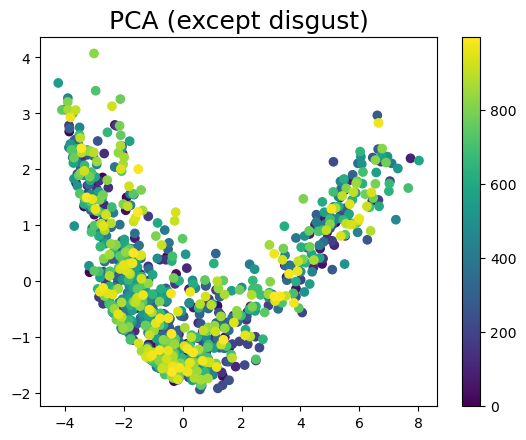

In [7]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (except disgust)", fontsize=18)
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

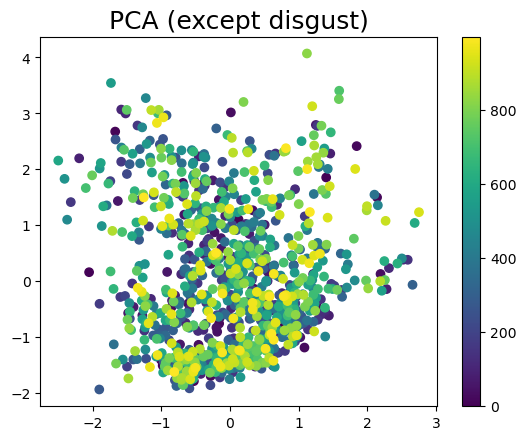

In [8]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (except disgust)", fontsize=18)
plt.scatter(pca_emb[:, 2], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

In [ ]:
import umap
reducer = umap.UMAP(n_neighbors=10,min_dist=1,n_components=128,metric='euclidean',n_epochs=2000)
embedding = reducer.fit_transform(nth_layer_outputs)
print(np.shape(embedding))
#colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']
#plt.scatter(embedding[:, 0], embedding[:, 1])#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)

In [ ]:
t = np.arange(leng)

fig = plt.figure()
plt.title("UMAP (except disgust)", fontsize=18)
plt.scatter(embedding[:, 2], embedding[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


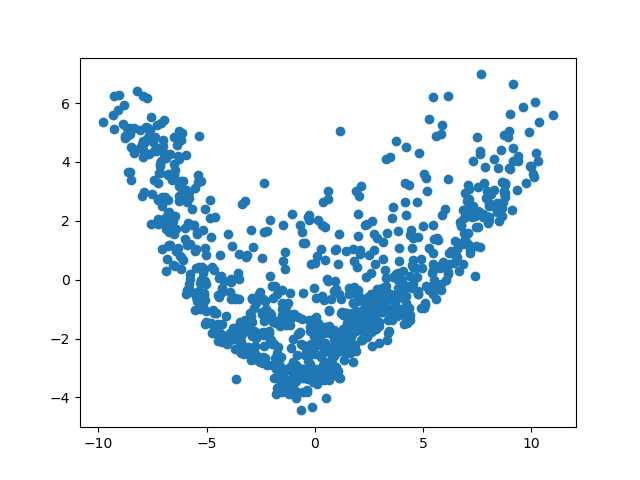

In [88]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,0],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (-10, -4)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(-10, -4)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


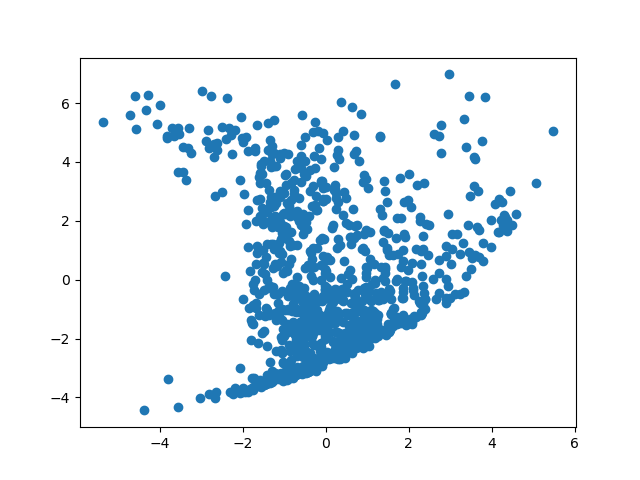

In [90]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,2],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (-4, 0)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(-4, 0)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

In [103]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
#import matplotlib.pyplot as plt
from matplotlib import offsetbox
#import numpy as np

In [122]:
print(np.shape(faces))
from scipy.ndimage import zoom
f = zoom(faces, (1, 0.5, 0.5))
print(np.shape(f))

(1000, 48, 48)
(1000, 24, 24)


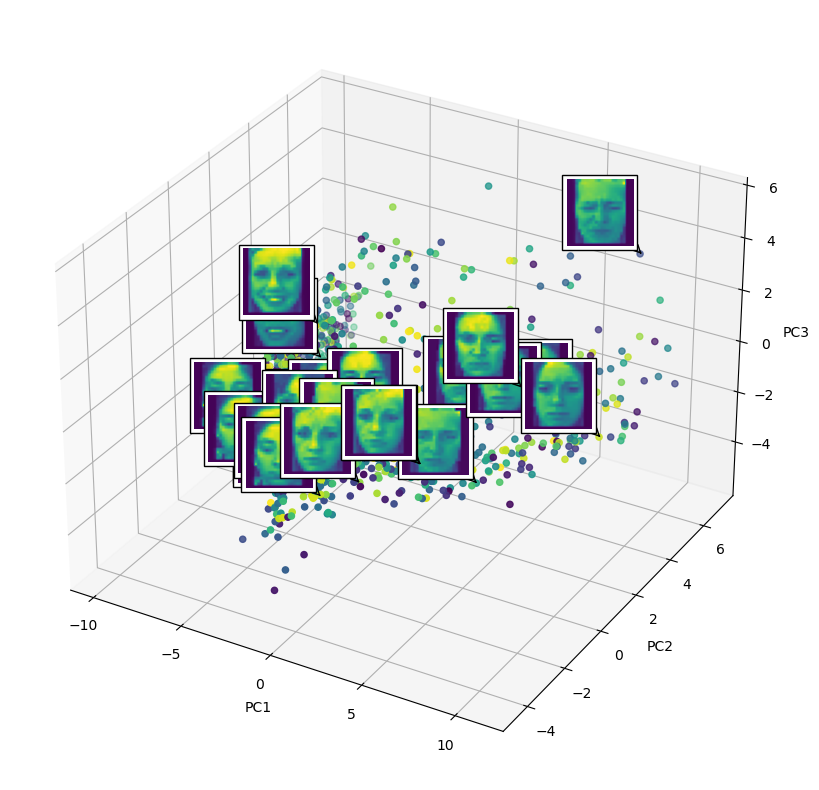

In [128]:
xs = pca_emb[:,0]
ys = pca_emb[:,1]
zs = pca_emb[:,2]

c = t

fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(xs, ys, zs, c=c, marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])


def proj(X, ax1, ax2):
    """ From a 3D point in axes ax1, 
        calculate position in 2D in ax2 """
    x,y,z = X
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax1.get_proj())
    return ax2.transData.inverted().transform(ax1.transData.transform((x2, y2)))

def image(ax,arr,xy):
    """ Place an image (arr) as annotation at position xy """
    im = offsetbox.OffsetImage(arr, zoom=2)
    im.image.axes = ax
    ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                        xycoords='data', boxcoords="offset points",
                        pad=0.3, arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)

    
index=0
for s in zip(xs,ys,zs):
    x,y = proj(s, ax, ax2)
    if (index % 40 == 0):
        image(ax2,f[index],[x,y])
    index=index+1


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

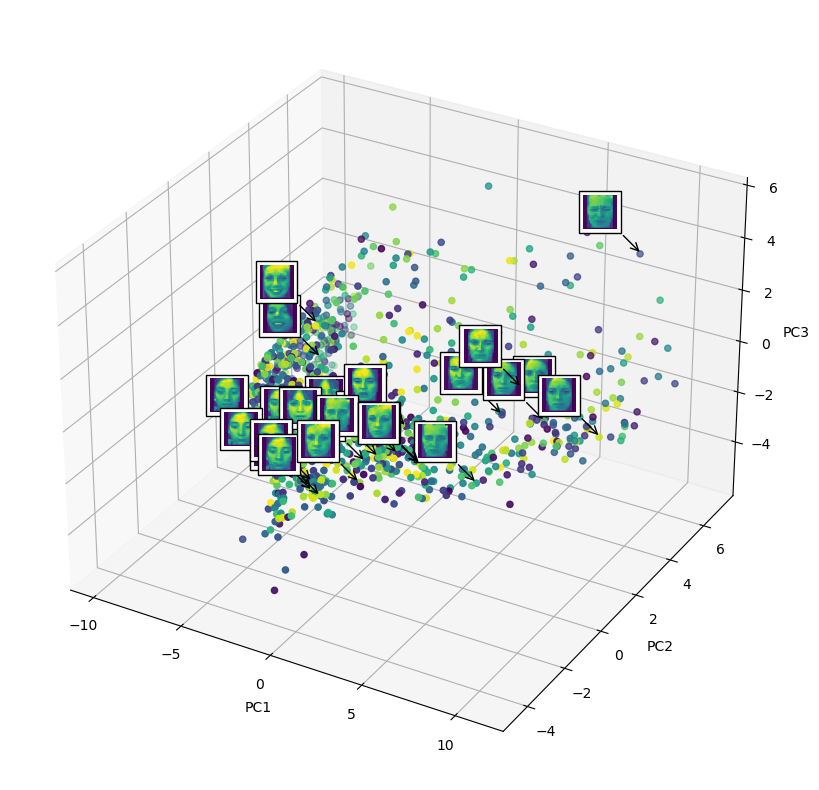

In [129]:
xs = pca_emb[:,0]
ys = pca_emb[:,1]
zs = pca_emb[:,2]

c = t

fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(xs, ys, zs, c=c, marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])


def proj(X, ax1, ax2):
    """ From a 3D point in axes ax1, 
        calculate position in 2D in ax2 """
    x,y,z = X
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax1.get_proj())
    return ax2.transData.inverted().transform(ax1.transData.transform((x2, y2)))

def image(ax,arr,xy):
    """ Place an image (arr) as annotation at position xy """
    im = offsetbox.OffsetImage(arr, zoom=1)
    im.image.axes = ax
    ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                        xycoords='data', boxcoords="offset points",
                        pad=0.3, arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)

    
index=0
for s in zip(xs,ys,zs):
    x,y = proj(s, ax, ax2)
    if (index % 40 == 0):
        image(ax2,f[index],[x,y])
    index=index+1


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

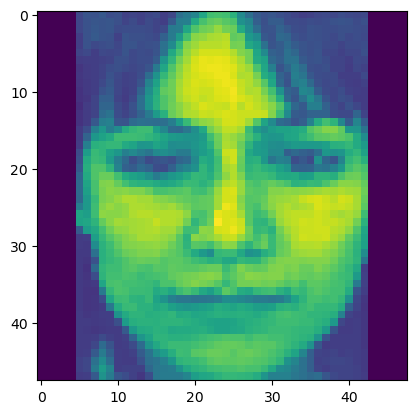

In [99]:
plt.imshow(faces[100])

In [50]:
# summarize filters in each NN layer
from keras.models import load_model, Model
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np
import sys

# def image_to_feature_vector(image):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
#     return cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48,48)).reshape(1, 48, 48) # not 48,48,1 but 1,48,48. some mismatch between libraries in handling data

#loads a pre-trained model for expression classification
model = load_model('/home/devanandt/Documents/FACE_VEC_LANG/IDENTITY_DISENTANGLEMENT_PAPERS/CNN_FER/CNN_FER2013_onesimplex/Happy_Sad/model_HS.h5')

# image_test = cv2.imread(sys.argv[1])
inp = faces[idx].reshape(1,48,48)
# inp = image_to_feature_vector(image_test)
print(np.shape(inp))

# summarize filter shapes
#for layer in model.layers:
	# check for convolutional layer
	#if 'conv' not in layer.name:
	#	continue
	# get filter weights
	#filters, biases = layer.get_weights()
    #print(layer.name)
	#print(layer.name, filters.shape)
# layer_name='dropout_3'
# layer_name='maxpool2d_1'
# layer_name='conv2d_2'
layer_name='dropout_4'
intermediate_layer_model = Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output)
#intermediate_layer_model = Model(inputs=model.inputs,outputs=model.layers[4].output)

nth_layer_outputs=[]
for idx in range(leng):
    output=intermediate_layer_model.predict(faces[idx].reshape(1,48,48))
    nth_layer_outputs.append(output[0])

print(np.shape(nth_layer_outputs))
# output=output[:,:,:,0].reshape(6,6)
#s=np.shape(output)[-1]
#output=output[:,:,:,round(s-(s/2))].reshape(48,48)

#plt.imshow(output)
#plt.show()

(1, 48, 48)
(1000, 128)


In [7]:
import umap

In [33]:
#print(output[0])
reducer = umap.UMAP(n_neighbors=10,min_dist=1,n_components=128,metric='euclidean',n_epochs=2000)
embedding = reducer.fit_transform(nth_layer_outputs)
print(np.shape(embedding))
#colors = ['blue', 'orange' , 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']
#plt.scatter(embedding[:, 0], embedding[:, 1])#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)

(1000, 128)


<IPython.core.display.Javascript object>


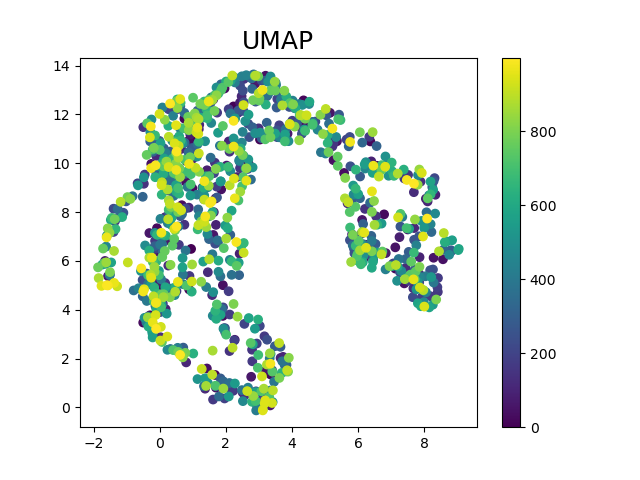

In [34]:
t = np.arange(leng)

fig = plt.figure()
plt.title("UMAP", fontsize=18)
plt.scatter(embedding[:, 0], embedding[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
pca.fit(nth_layer_outputs)
print(pca.explained_variance_ratio_)
pca_emb = pca.fit_transform(nth_layer_outputs)

[8.59111027e-01 8.81547390e-02 1.23325612e-02 9.92269945e-03
 6.13893242e-03 3.63440587e-03 2.97108812e-03 2.15824198e-03
 2.00902710e-03 1.44369703e-03 1.37890120e-03 1.21204865e-03
 7.30472056e-04 5.96868468e-04 5.30914611e-04 5.04587468e-04
 4.65616631e-04 4.28063768e-04 3.73944412e-04 3.41501527e-04
 2.99429489e-04 2.87102739e-04 2.68598791e-04 2.38141386e-04
 2.35431300e-04 1.95268579e-04 1.88325207e-04 1.80659695e-04
 1.74435104e-04 1.50911119e-04 1.42360697e-04 1.34377613e-04
 1.28826303e-04 1.24012671e-04 1.12739162e-04 1.09424312e-04
 1.02339131e-04 9.62146432e-05 9.39061722e-05 9.03949369e-05
 8.33224087e-05 8.16173359e-05 7.87581836e-05 7.77129740e-05
 7.39388067e-05 6.92881535e-05 6.63220968e-05 6.47265443e-05
 6.28276195e-05 5.77319826e-05 5.70696436e-05 5.63843474e-05
 5.44384905e-05 5.20981942e-05 5.04971874e-05 4.68608408e-05
 4.58213752e-05 4.31879800e-05 4.06421104e-05 3.98957821e-05
 3.93965192e-05 3.76816284e-05 3.55869286e-05 3.42493550e-05
 3.33208164e-05 3.242474

<IPython.core.display.Javascript object>


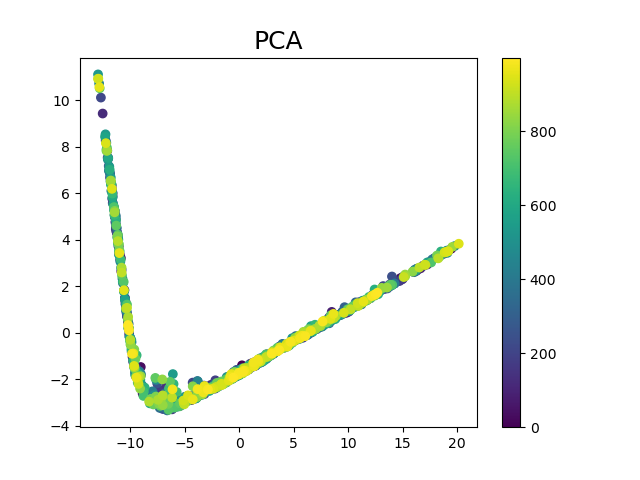

In [59]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA", fontsize=18)
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


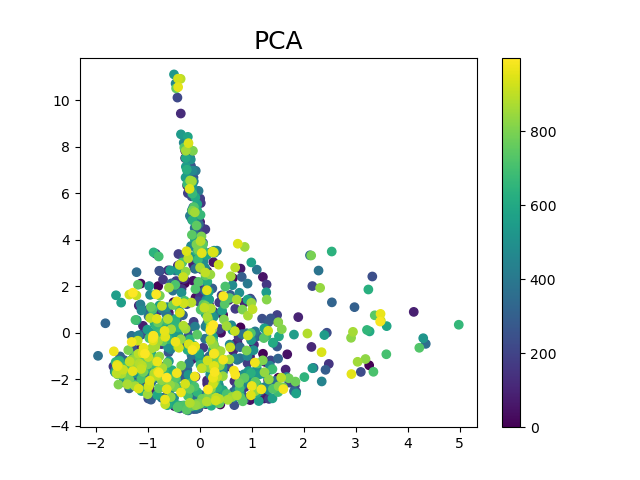

In [60]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA", fontsize=18)
plt.scatter(pca_emb[:, 2], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.40327242
For n_clusters = 4 The average silhouette_score is : 0.33300534
For n_clusters = 5 The average silhouette_score is : 0.31412914
For n_clusters = 6 The average silhouette_score is : 0.34022796
For n_clusters = 7 The average silhouette_score is : 0.33774814
For n_clusters = 8 The average silhouette_score is : 0.351604
For n_clusters = 9 The average silhouette_score is : 0.34098396


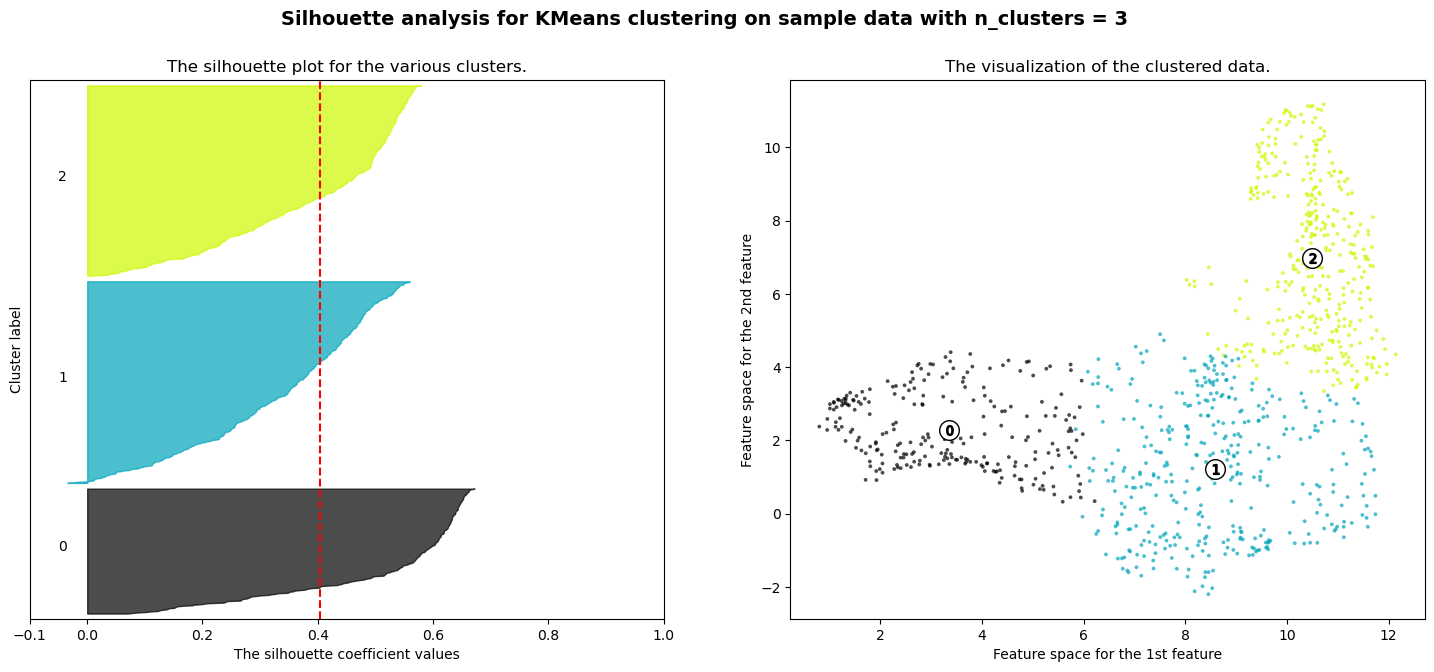

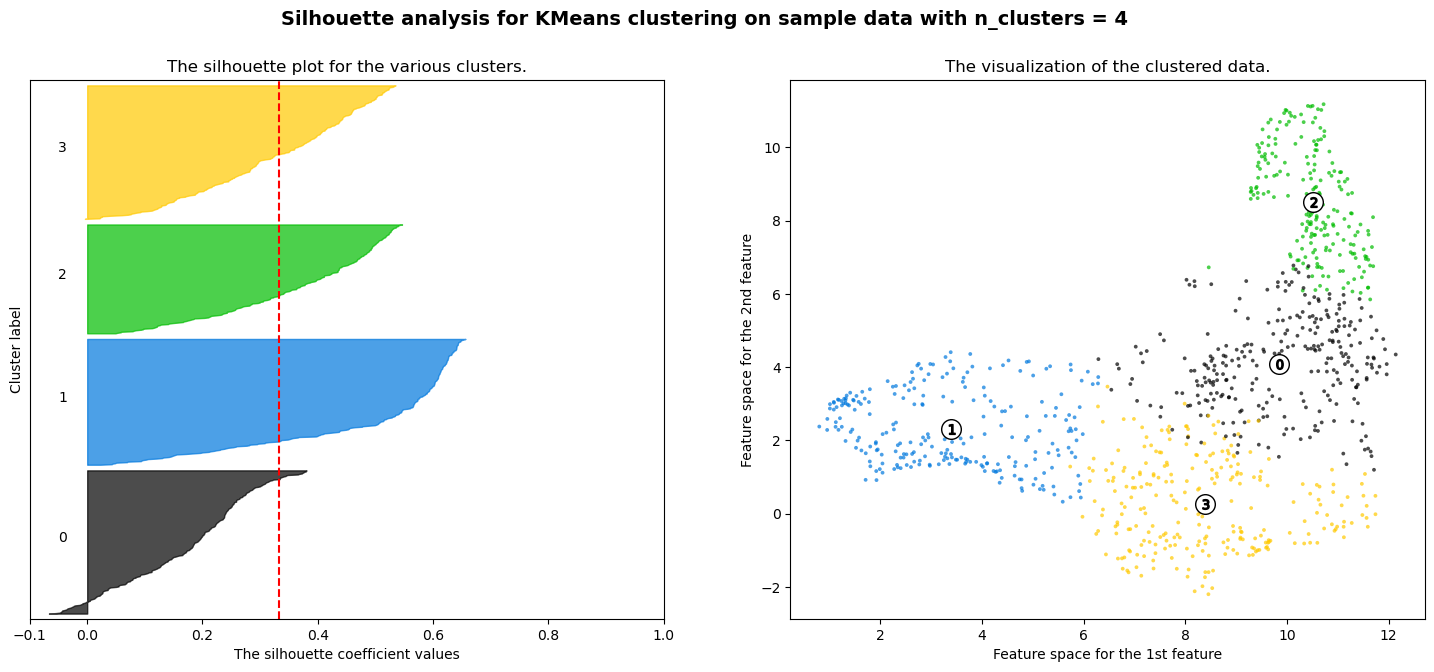

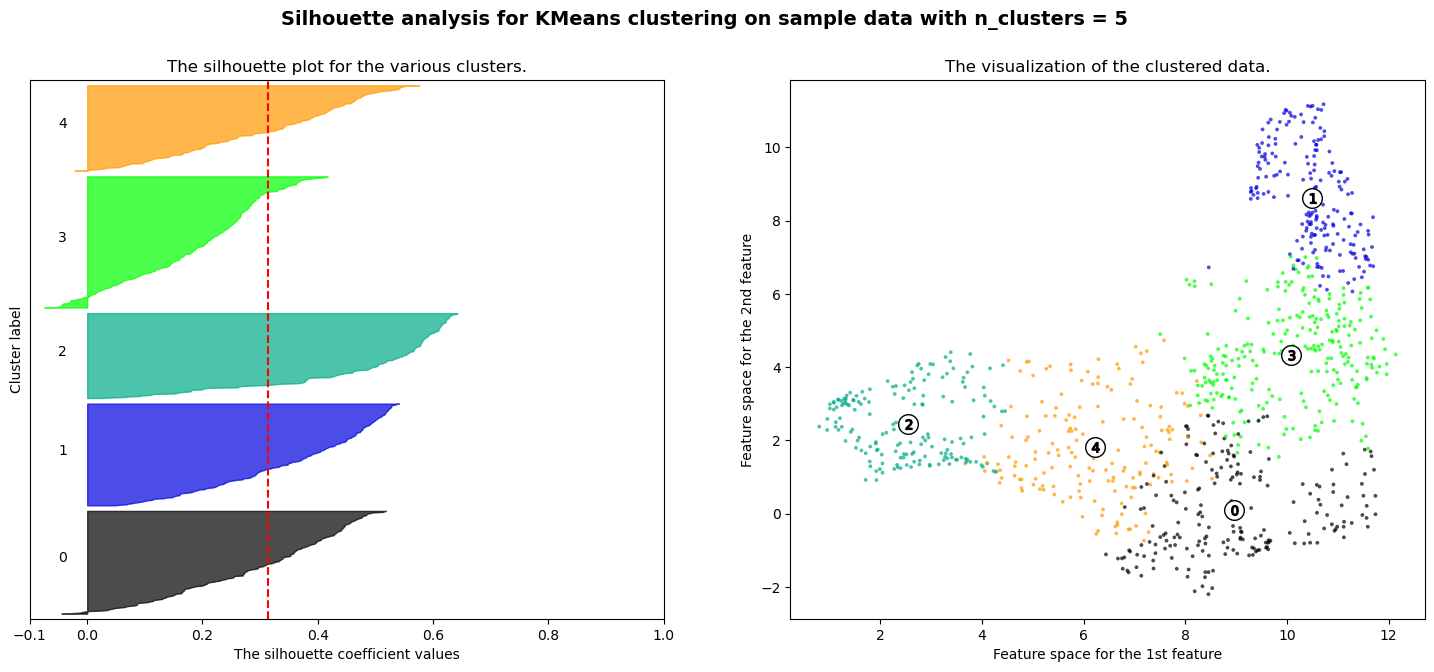

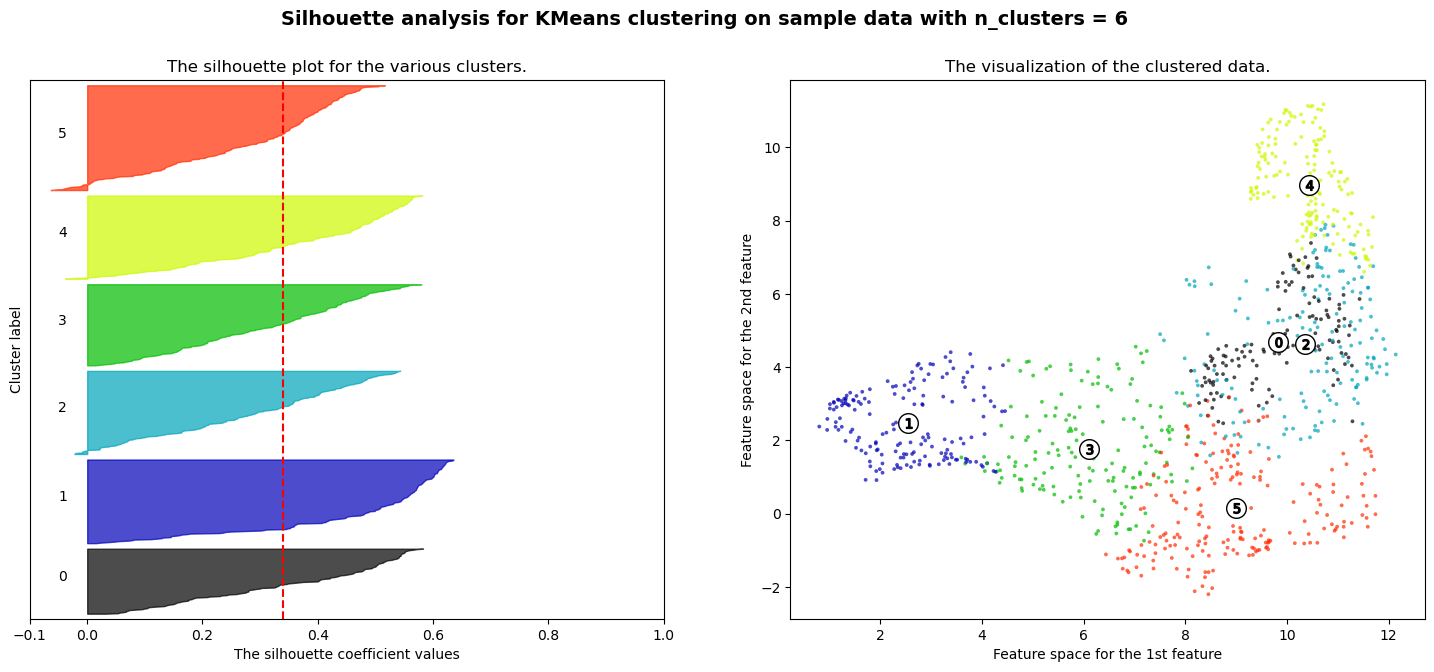

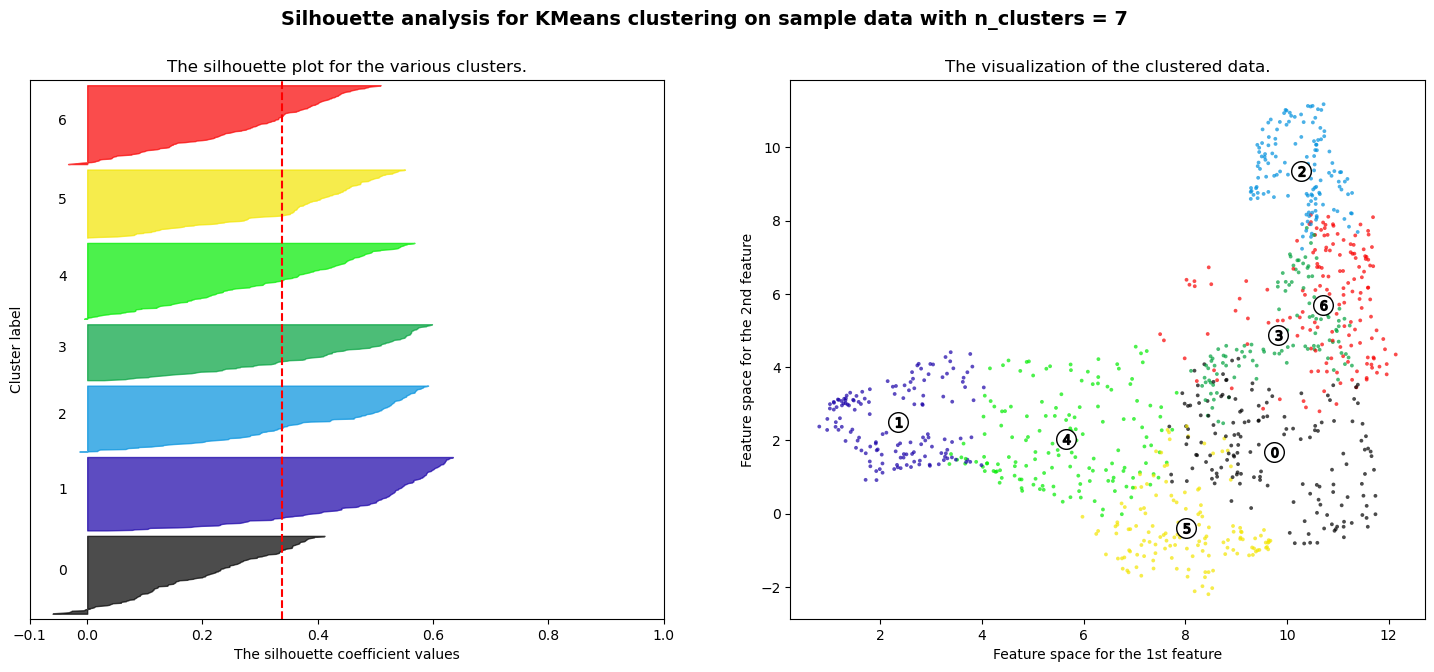

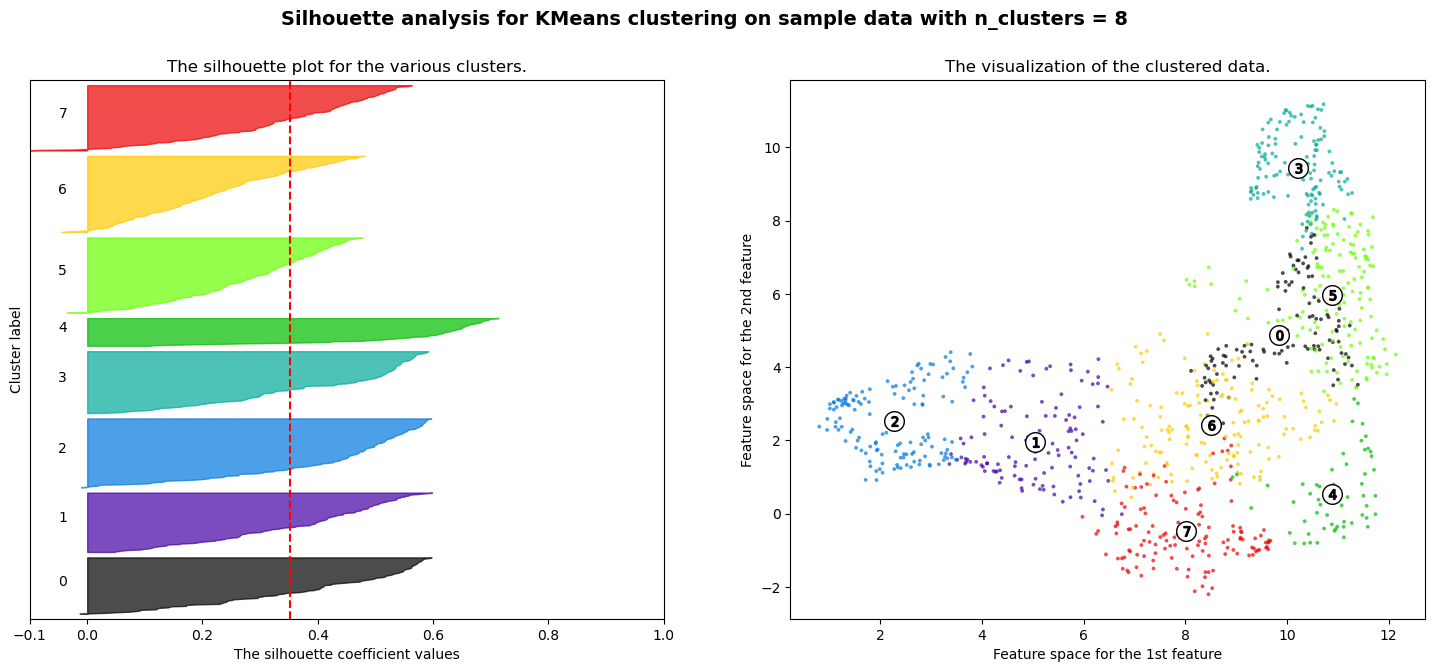

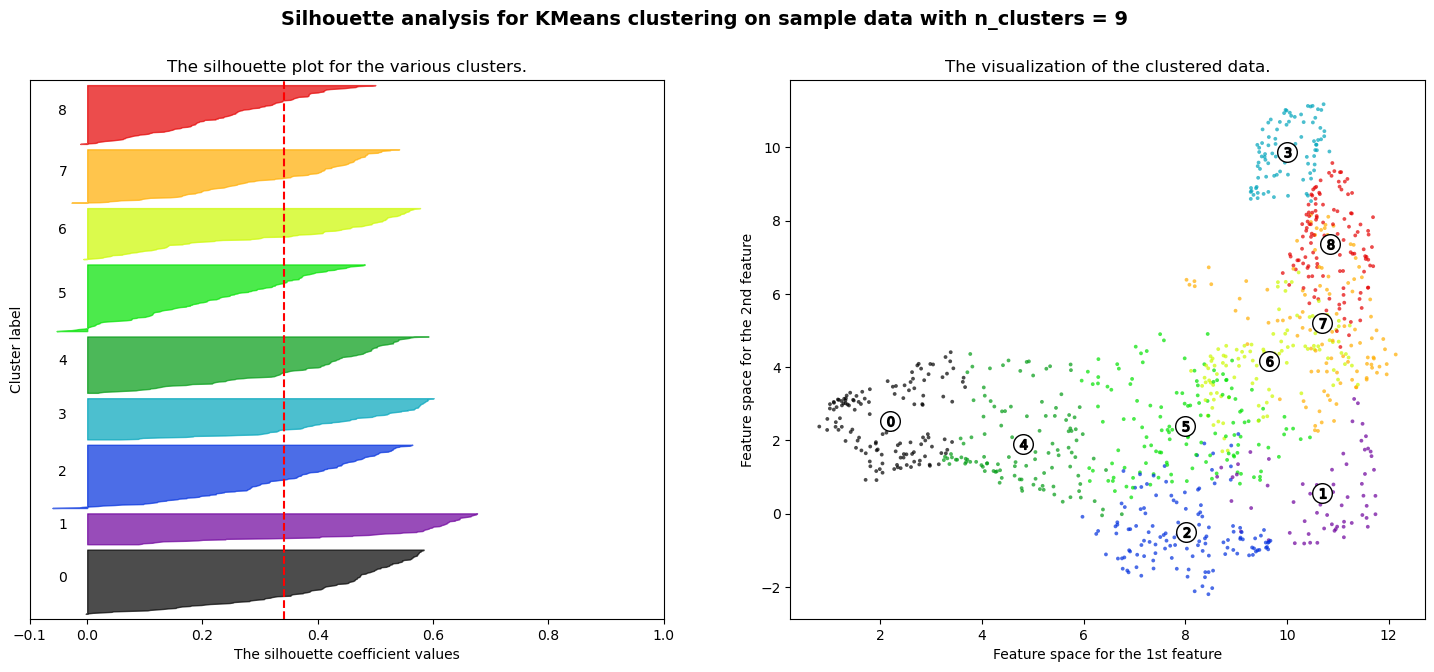

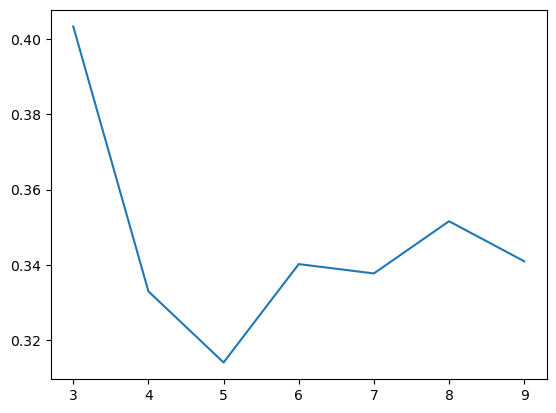

In [10]:
#import matplotlib
#matplotlib.rcParams['figure.figsize'] = (4,4)
#%matplotlib gtk

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm


range_n_clusters = np.array(range(3,10))
silhouette_avg_n_clusters = []
X=embedding
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



plt.plot(range_n_clusters, silhouette_avg_n_clusters)

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


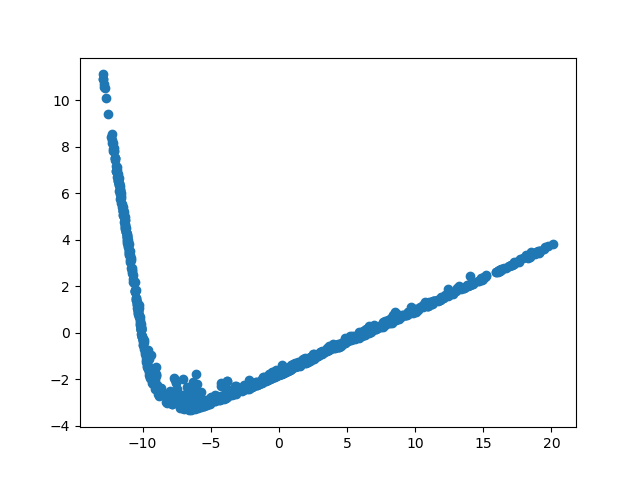

In [61]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,0],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (10, 8)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(10, 8)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


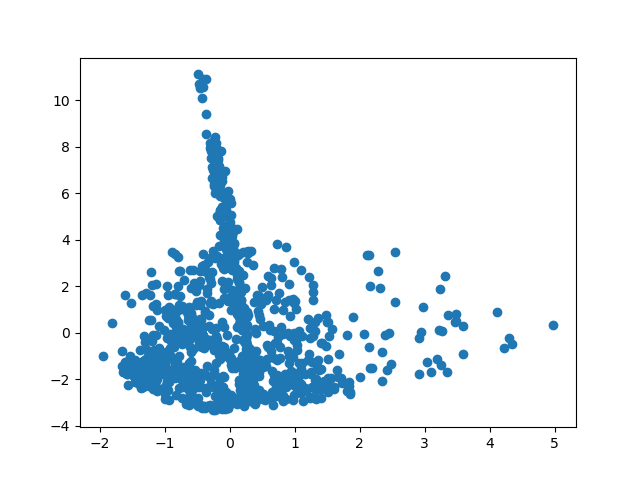

In [62]:
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,2],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (4,8)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(4,8)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

In [1]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [63]:
# def image_to_feature_vector(image):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
#     return cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48,48)).reshape(1, 48, 48) # not 48,48,1 but 1,48,48. some mismatch between libraries in handling data

#loads a pre-trained model for expression classification
model = load_model('/home/devanandt/Documents/FACE_VEC_LANG/IDENTITY_DISENTANGLEMENT_PAPERS/CNN_FER/CNN_FER2013_onesimplex/Neutral_Happy/model_NH.h5')

# image_test = cv2.imread(sys.argv[1])
inp = faces[idx].reshape(1,48,48)
# inp = image_to_feature_vector(image_test)
print(np.shape(inp))

# summarize filter shapes
#for layer in model.layers:
	# check for convolutional layer
	#if 'conv' not in layer.name:
	#	continue
	# get filter weights
	#filters, biases = layer.get_weights()
    #print(layer.name)
	#print(layer.name, filters.shape)
# layer_name='dropout_3'
# layer_name='maxpool2d_1'
# layer_name='conv2d_2'
layer_name='dropout_4'
intermediate_layer_model = Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output)
#intermediate_layer_model = Model(inputs=model.inputs,outputs=model.layers[4].output)

nth_layer_outputs=[]
for idx in range(leng):
    output=intermediate_layer_model.predict(faces[idx].reshape(1,48,48))
    nth_layer_outputs.append(output[0])

print(np.shape(nth_layer_outputs))
# output=output[:,:,:,0].reshape(6,6)
#s=np.shape(output)[-1]
#output=output[:,:,:,round(s-(s/2))].reshape(48,48)

#plt.imshow(output)
#plt.show()

(1, 48, 48)
(1000, 128)


In [64]:
pca = PCA(n_components=128)
pca.fit(nth_layer_outputs)
print(pca.explained_variance_ratio_)
pca_emb = pca.fit_transform(nth_layer_outputs)

[8.51488582e-01 8.68597836e-02 2.39540378e-02 9.57938473e-03
 6.96979767e-03 3.17225388e-03 2.72493094e-03 1.99277201e-03
 1.52508775e-03 1.21368856e-03 1.10863858e-03 8.17989240e-04
 6.68388082e-04 5.60215718e-04 5.47362601e-04 4.63553747e-04
 4.25874467e-04 4.05465324e-04 3.84996494e-04 3.40188963e-04
 3.27443133e-04 2.97574643e-04 2.65993594e-04 2.52687267e-04
 2.38074210e-04 2.02749212e-04 1.88799588e-04 1.80039197e-04
 1.62789565e-04 1.49679495e-04 1.38180895e-04 1.11461077e-04
 1.01764696e-04 9.60970532e-05 8.98803219e-05 8.68900395e-05
 8.09943294e-05 7.54166359e-05 7.29573959e-05 7.27531843e-05
 6.83367982e-05 6.46648421e-05 6.33920610e-05 6.12848674e-05
 5.72428177e-05 5.43808087e-05 5.22067781e-05 5.01195623e-05
 4.84261774e-05 4.62083553e-05 4.23884134e-05 4.07600898e-05
 4.03476190e-05 3.82093929e-05 3.59638691e-05 3.48391703e-05
 3.29743409e-05 3.25313211e-05 3.14869351e-05 3.02649169e-05
 2.83875353e-05 2.75218759e-05 2.70615578e-05 2.55680023e-05
 2.50573634e-05 2.454069

<IPython.core.display.Javascript object>


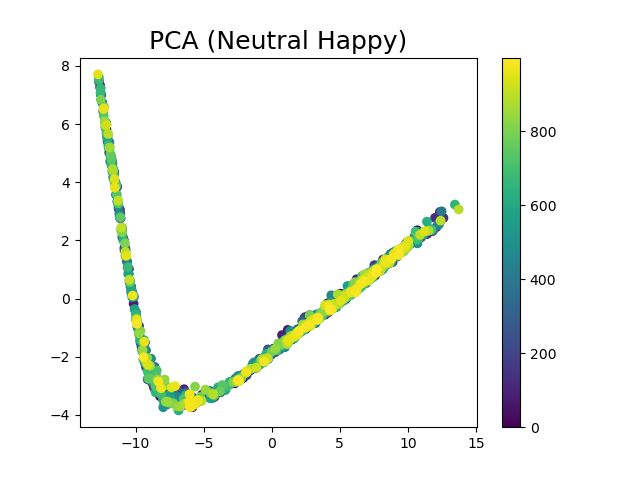

In [67]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (Neutral Happy)", fontsize=18)
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


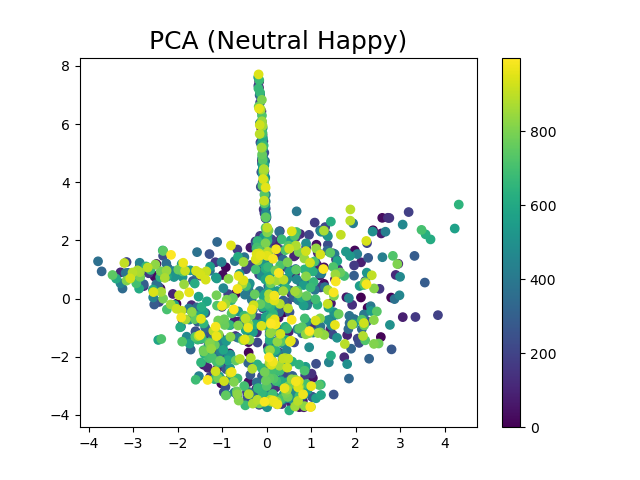

In [68]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (Neutral Happy)", fontsize=18)
plt.scatter(pca_emb[:, 2], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


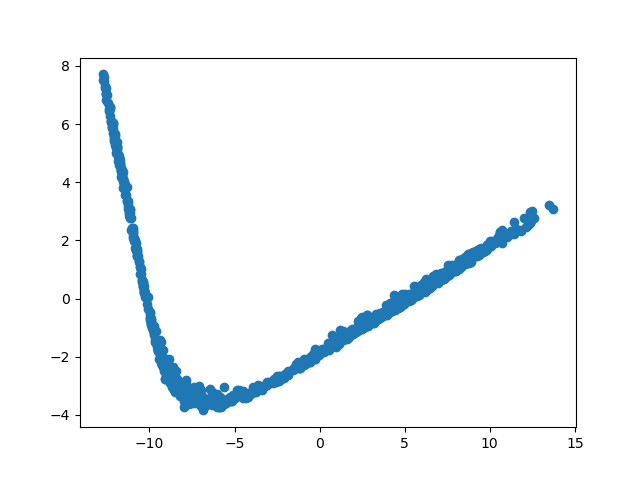

In [69]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,0],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (10, 8)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(10, 8)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


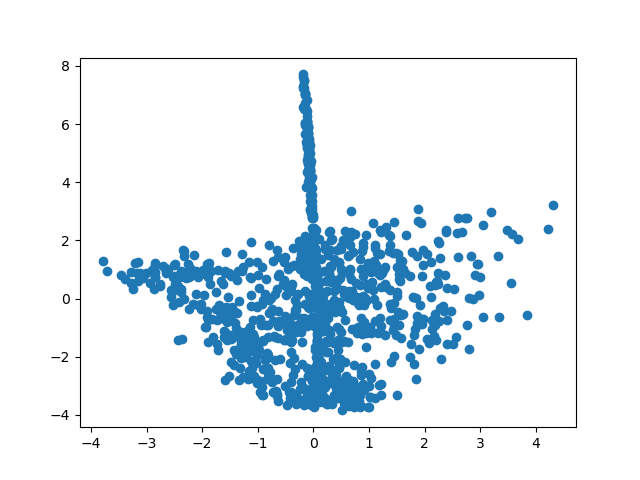

In [70]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,2],pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (4, 6)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(4, 6)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

In [9]:
# def image_to_feature_vector(image):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
#     return cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (48,48)).reshape(1, 48, 48) # not 48,48,1 but 1,48,48. some mismatch between libraries in handling data

#loads a pre-trained model for expression classification (Anger Happy)
model = load_model('/home/devanandt/Documents/FACE_VEC_LANG/IDENTITY_DISENTANGLEMENT_PAPERS/CNN_FER/CNN_FER2013_onesimplex/Anger_Happy/model_AH.h5')

# image_test = cv2.imread(sys.argv[1])
inp = faces[idx].reshape(1,48,48)
# inp = image_to_feature_vector(image_test)
print(np.shape(inp))

# summarize filter shapes
#for layer in model.layers:
	# check for convolutional layer
	#if 'conv' not in layer.name:
	#	continue
	# get filter weights
	#filters, biases = layer.get_weights()
    #print(layer.name)
	#print(layer.name, filters.shape)
# layer_name='dropout_3'
# layer_name='maxpool2d_1'
# layer_name='conv2d_2'
layer_name='dropout_4'
intermediate_layer_model = Model(inputs=model.inputs,outputs=model.get_layer(layer_name).output)
#intermediate_layer_model = Model(inputs=model.inputs,outputs=model.layers[4].output)

nth_layer_outputs=[]
for idx in range(leng):
    output=intermediate_layer_model.predict(faces[idx].reshape(1,48,48))
    nth_layer_outputs.append(output[0])

print(np.shape(nth_layer_outputs))
# output=output[:,:,:,0].reshape(6,6)
#s=np.shape(output)[-1]
#output=output[:,:,:,round(s-(s/2))].reshape(48,48)

#plt.imshow(output)
#plt.show()

(1, 48, 48)
(1000, 128)


In [10]:
pca = PCA(n_components=128)
pca.fit(nth_layer_outputs)
print(pca.explained_variance_ratio_)
pca_emb = pca.fit_transform(nth_layer_outputs)

[6.55882305e-01 1.77293826e-01 6.15526046e-02 2.68020844e-02
 1.42818047e-02 1.36789740e-02 6.52577789e-03 5.54781195e-03
 4.13640815e-03 3.08796215e-03 2.47354059e-03 2.21971874e-03
 1.92532441e-03 1.75394678e-03 1.63230551e-03 1.56399054e-03
 1.36229247e-03 1.24227011e-03 1.09934603e-03 9.70070221e-04
 8.90420041e-04 8.28108952e-04 7.93014484e-04 6.54187583e-04
 6.27022663e-04 5.50473898e-04 5.36025184e-04 5.34489036e-04
 4.40569614e-04 4.31218428e-04 4.11770472e-04 3.93120276e-04
 3.82354443e-04 3.68191325e-04 3.16043056e-04 3.06946955e-04
 2.98256127e-04 2.73343230e-04 2.56768171e-04 2.50078506e-04
 2.32585663e-04 2.21510046e-04 2.20781632e-04 2.04452696e-04
 1.95783111e-04 1.81661693e-04 1.73282085e-04 1.62894711e-04
 1.54352632e-04 1.51117791e-04 1.45991928e-04 1.37697559e-04
 1.32151472e-04 1.28848129e-04 1.27721813e-04 1.18840719e-04
 1.15455323e-04 1.12683534e-04 1.07970923e-04 9.92002678e-05
 9.49968139e-05 9.25528824e-05 8.98432427e-05 8.68369447e-05
 8.23080995e-05 7.715284

<IPython.core.display.Javascript object>


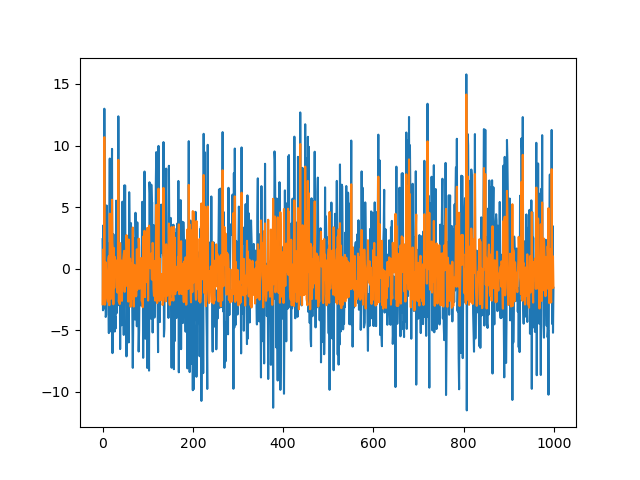

In [24]:
plt.figure()
plt.plot(pca_emb[:,0])
plt.plot(pca_emb[:,1])

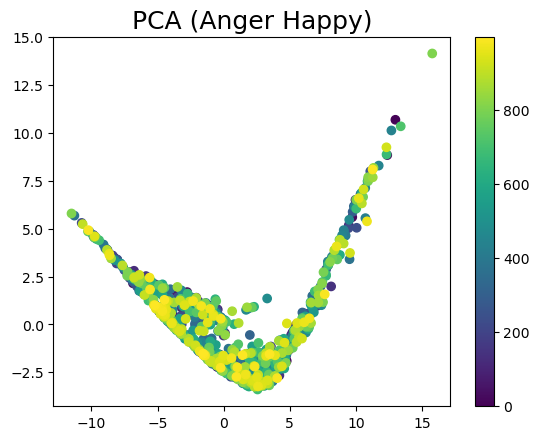

In [11]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (Anger Happy)", fontsize=18)
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

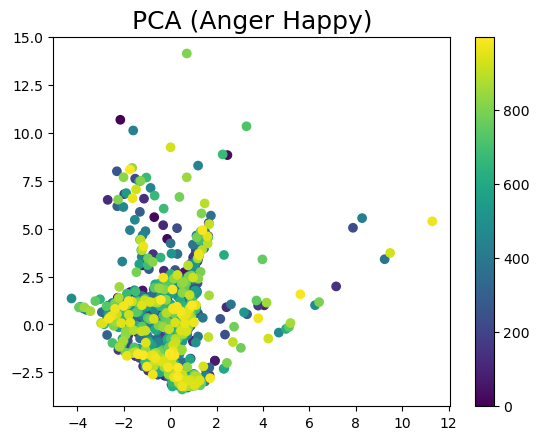

In [12]:
t = np.arange(leng)

fig = plt.figure()
plt.title("PCA (Anger Happy)", fontsize=18)
plt.scatter(pca_emb[:, 2], pca_emb[:, 1], c=t, cmap='viridis')#, c=id[s], cmap=matplotlib.colors.ListedColormap(colors), s=10)
plt.colorbar()
plt.show()

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


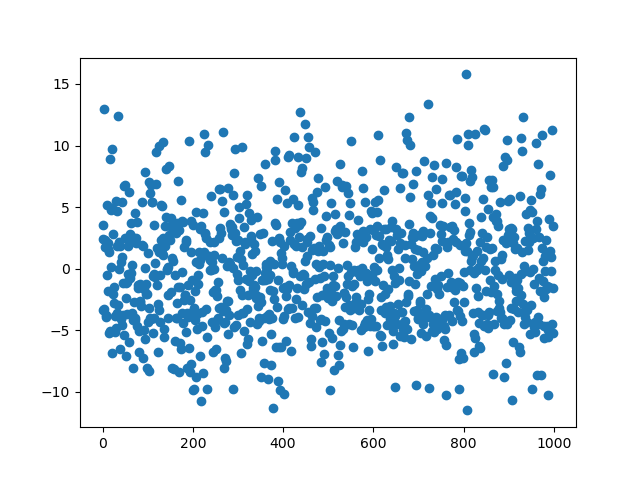

In [25]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,0], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (0, 10)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(0, 10)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


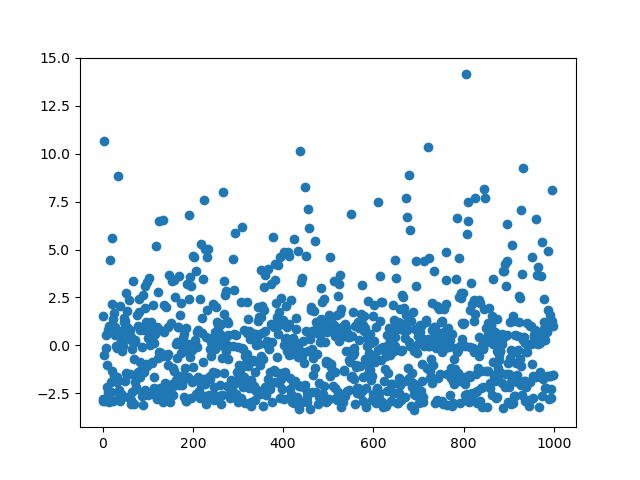

In [30]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,1], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (0, 10)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(0, 10)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


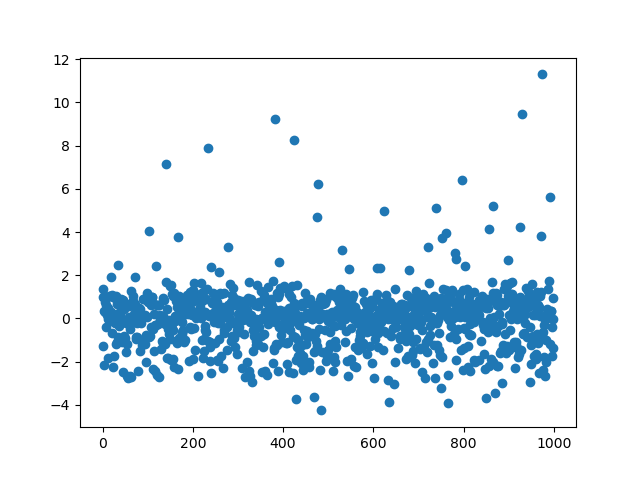

In [27]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,2], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (0, 10)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(0, 10)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()

<IPython.core.display.Javascript object>


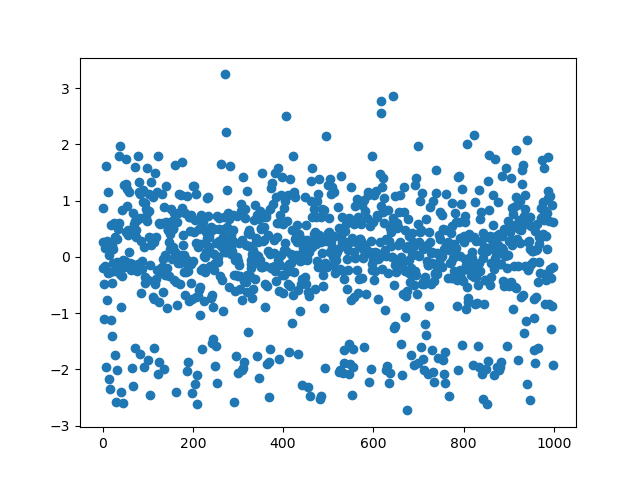

In [29]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# create figure and plot scatter
fig = plt.figure()
#plt.xlim([-2.75, 20])
#plt.ylim([-2.75, 20])
ax = fig.add_subplot(111)


#t = np.arange(len(data))


line, = ax.plot(pca_emb[:,3], ls="", marker="o")



# create the annotations box
im = OffsetImage(faces[0], zoom=1, cmap="viridis")
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.0,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)


def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        
        # find out the index within the array from the event
        
        ind, = line.contains(event)[1]["ind"]
        print(ind)
        
        
        # get the figure size
        #w,h = fig.get_size_inches()*fig.dpi
        #ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        #hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        #ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        ab.xybox = (0, 3)
        # make annotation box visible
        ab.set_visible(True)

        # place it at the position of the hovered scatter point
        #ab.xy =(x[ind], y[ind])
        ab.xy =(0, 3)
        #ab.xytext = (ind, ind)
        # set the image corresponding to that point
        im.set_data(faces[ind])
        
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover) 
plt.show()